In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
#loading the dataset

In [3]:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

X_train,X_test =X_train/255.0,X_test/255.0

y_train,y_test = y_train.flatten(),y_test.flatten()

print('X_train shape : ', X_train.shape)

print('y_train shape : ', y_train.shape)

170500096/170498071 [==============================] - 904s 5us/step
X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000,)


In [5]:
#number of classes

In [8]:
X = len(set(y_train))
print('number of classes : ',X)

number of classes :  10


In [7]:
#Building the model

In [10]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(X,activation='softmax')(x)

model = Model(i,x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              118067

In [12]:
#compile and fit the model

In [14]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 155s 3ms/sample - loss: 1.5816 - accuracy: 0.4197 - val_loss: 1.3521 - val_accuracy: 0.4990
Epoch 2/15
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.2899 - accuracy: 0.5353 - val_loss: 1.1398 - val_accuracy: 0.5895
Epoch 3/15
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.1471 - accuracy: 0.5892 - val_loss: 1.0664 - val_accuracy: 0.6245
Epoch 4/15
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.0593 - accuracy: 0.6228 - val_loss: 0.9630 - val_accuracy: 0.6609
Epoch 5/15
50000/50000 [==============================] - 111s 2ms/sample - loss: 0.9842 - accuracy: 0.6523 - val_loss: 0.9385 - val_accuracy: 0.6707
Epoch 6/15
50000/50000 [==============================] - 113s 2ms/sample - loss: 0.9234 - accuracy: 0.6725 - val_loss: 0.9128 - val_accuracy: 0.6794
Epoch 7/15
50000/50000 [==========================

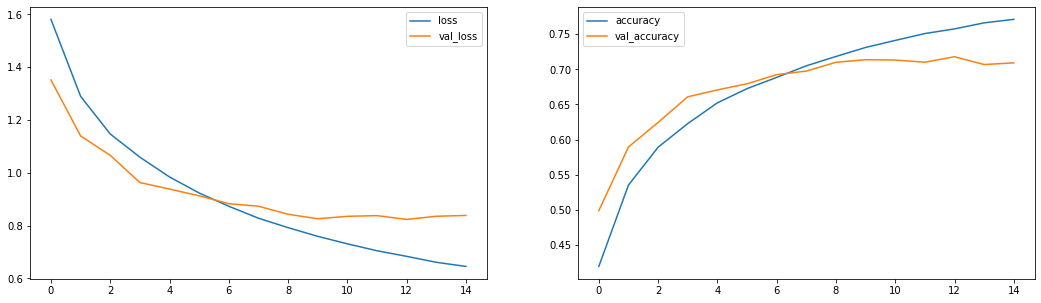

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.subplot(122)
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion_Matrix, without normalization
[[776  12  42  34  24   2   8   8  73  21]
 [ 29 772   9  16   7   8  11   5  44  99]
 [ 79   2 568 113  93  46  45  34  16   4]
 [ 27   3  58 645  44 104  63  32  12  12]
 [ 29   1  59 110 645  28  40  74  13   1]
 [ 15   2  29 314  50 521  21  34   7   7]
 [  4   2  36  95  42  21 782   6  11   1]
 [ 14   3  34  61  56  51   6 765   3   7]
 [ 66  15   6  21   8   3   3   5 860  13]
 [ 41  53  11  38  11   7  17  17  47 758]]


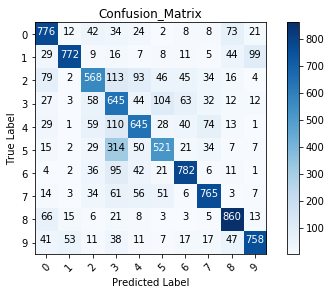

In [20]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion_Matrix',
                         cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion Matrix.
    Normalization can be applied by setting normalized =True
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion_Matrix, without normalization')
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [21]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [22]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [23]:
#Show Some Misclassified examples

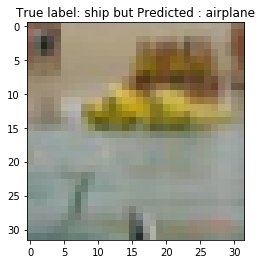

In [30]:
misclassified_idx = np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True label: %s but Predicted : %s' %(labels[y_test[i]],labels[p_test[i]]));